In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def draw_line(x0, y0, x1, y1,color1,color2,gran, arr,z):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    znak = np.sign(z)
    z = abs(z)
    deltac = ((color2 - color1) / np.sqrt(dx * dx + dy * dy)).astype("float64")
    color = np.array(color1.copy().astype("float64"))
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    if dx > dy:
        err = dx / 2
        while x != x1:
            vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, z*znak], [color[0],color[1],color[2]]])
            color += deltac
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
            z+=1
    else:
        err = dy / 2
        while y != y1:
            vp[y:y+gran, x:x+gran] = color
            arr.append([[x,y, z*znak], [color[0],color[1],color[2]]])         
            color += deltac
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
            z+=1
    vp[y:y+gran, x:x+gran] = color
    arr.append([[x,y,z*znak], [color[0],color[1],color[2]]])    
    return arr,z*znak

In [3]:
def createfigure(num,color1,color2,arr,gran,arr1,z):
    x_center_1 =x_cent+ step
    y_center_1 = y_cent + int(step**2)
    
    

    x_center_2 = x_center_1+step
    y_center_2 = y_cent + int((2*step)**2)
    arr1.append([[x_center_2,y_center_2,1], color2])
    right = []
    left = []
    #vpravo
    if num == 0:
        # odna vetv (nyzhnaya)
        arr,z = draw_line(y_cent,x_cent,y_center_1,x_center_1,color1,color2,gran, arr,z)
        arr1.append([[y_cent,x_cent,z], color1])
        arr1.append([[y_center_1,x_center_1,z], color2])
        arr.pop(len(arr)-1)
        arr,z = draw_line(y_center_1,x_center_1,y_center_2,x_center_2,color2,color1,gran,arr,z)
        arr1.append([[y_center_1,x_center_1,z], color2])
        arr1.append([[y_center_2,x_center_2,z], color1])
        arr.pop(len(arr)-1)
        
        right,z = draw_line(y_cent,x_cent,y_center_1,x_center_1,color1,color2,gran,  right,z)
        right.pop(len(right)-1)
        right,z = draw_line(y_center_1,x_center_1,y_center_2,x_center_2,color2,color1,gran, right,z)
        right.pop(len(right)-1)

        
        x_center_1 =x_cent - step
        x_center_2 = x_center_1 - step
        arr1.append([[x_center_2,y_center_2,z], color1])
        
#         vtorai vetv (verhnaya)
        arr,z = draw_line(y_center_1,x_center_1,y_cent,x_cent,color2,color1,gran, arr,z)
        arr.pop(len(arr)-1)
        arr1.append([[y_center_1,x_center_1,1], color2])
        arr1.append([[y_cent,x_cent,1], color1])
        
        arr,z = draw_line(y_center_2,x_center_2,y_center_1,x_center_1,color1,color2,gran, arr,z)
        arr.pop(len(arr)-1)
        
        arr1.append([[y_center_2,x_center_2,z], color1])
        arr1.append([[y_center_1,x_center_1,z], color2])
        
        left,z = draw_line(y_center_1,x_center_1,y_cent,x_cent,color2,color1,gran, left,z)
        left.pop(len(left)-1)
        
        arr1.append([[y_center_1,x_center_1,1], color2])
        arr1.append([[y_cent,x_cent,1], color1])
        
        left,z = draw_line(y_center_2,x_center_2,y_center_1,x_center_1,color1,color2,gran, left,z)
        left.pop(len(left)-1)
        
        arr1.append([[y_center_2,x_center_2,z], color1])
        arr1.append([[y_center_1,x_center_1,z], color2])
        
        
        
        
#     vnis  
    
    if num == 1:
        # odna vetv (pravaya)

        arr,z=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,arr,z)
        arr.pop(len(arr)-1)
        arr,z=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, arr,z)
        arr.pop(len(arr)-1)
        
        
        right,z=draw_line(x_cent,y_cent,x_center_1,y_center_1,color1,color2,gran,right,z)
        right.pop(len(right)-1)
        right,z=draw_line(x_center_1,y_center_1,x_center_2,y_center_2,color2,color1,gran, right,z)
        right.pop(len(right)-1)
          
                    
        
        x_center_1 =x_cent - step
        x_center_2 = x_center_1 - step
                    
                    
        # vtorai vetv
        arr,z=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,arr,z)
        arr.pop(len(arr)-1)
        
        left,z=draw_line(x_center_1,y_center_1,x_cent,y_cent,color2,color1,gran,left,z)
        left.pop(len(left)-1)

        
        arr,z=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,arr,z)
        arr.pop(len(arr)-1)
                    
        left,z=draw_line(x_center_2,y_center_2,x_center_1,y_center_1,color1,color2,gran,left,z)
        left.pop(len(left)-1)           

    return left, right


# In[5]:


def save(arr, file_name, x, y):
    with open(file_name, 'w') as file:
        print(x, y, file=file)
        for item in arr:
            print(int(item[0][0]),int(item[0][1]), *item[1], file=file)


def read(file_name):
    with open(file_name, 'r') as f:
        arr = []
        ans = f.read().split('\n')[:-1]
        x, y = map(int, ans[0].split(' '))
        for st in ans[1:]:
            numbers = list(map(float, st.split(' ')))
            arr.append([[numbers[0], numbers[1], 1], numbers[2:]])
    return np.array(arr, dtype='object'), x, y



In [4]:
def Zalivka_Grad(vp, right, left, num, arr,gran):
    if num == 1:
        left.sort(key=lambda x: x[0][1])
        right.sort(key=lambda x: x[0][1])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                z = right[i][0][2]
                if y_l == y_r:
                    vp[y_r, x_l:x_r] = right[i][1]
                    vp[y_r+gran, x_l:x_r] = right[i][1]
                    for k in range(1, abs(x_l-x_r) + 1+gran):
                        arr.append([[x_l,y_l,z], right[i][1]])
    if num == 0:
        left.sort(key=lambda x: x[0][0])
        right.sort(key=lambda x: x[0][0])
        for i in range(len(right)):
            for j in range(len(left)):
                x_r = right[i][0][0]
                y_r = right[i][0][1]
                x_l = left[j][0][0]
                y_l = left[j][0][1]
                z = right[i][0][2]
                if x_l == x_r:
                    vp[y_l:y_r, x_l] = right[i][1]
                    vp[y_l:y_r, x_l+gran] = right[i][1]
                    for k in range(1, abs(y_l - y_r) + 1+gran):
                        arr.append([[x_l, y_l + k, z], right[i][1]])
    return vp,arr


In [5]:
def Risunok(C,vp,kraska):
    for i in range(len(C)):
        vp[int(C[i][0]),int(C[i][1])] = kraska[i][1]
    return vp


[118  56   0] 165 17


(-0.5, 399.5, 399.5, -0.5)

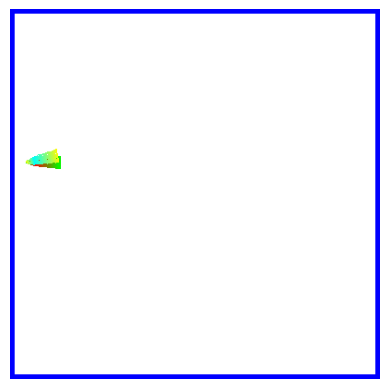

In [6]:


W = 400
H = 400
bg_clr = (255, 255, 255)
vp = np.full((H, W,3), bg_clr, dtype='uint8')
vp1 = np.full((H, W,3), bg_clr, dtype='uint8')
width = 5
blue = (0,0,255)
vp[:width,:] = blue
vp[:,-width:] = blue
vp[-width:,:] = blue
vp[:,:width] = blue


 # shag   
step = np.random.randint(3, 6)
# pologenie

gran = np.random.randint(2, 5)

num = np.random.randint(0,1)
center = np.random.randint(50, 150, size=3)
center[2] = 0
x_cent = np.random.randint(width+(step)**2 , W -  (2*step)**2)
y_cent = np.random.randint(width+(step)**2, H  -(2*step)**2)


print(center,x_cent,y_cent)
color1 = np.array([0, 255, 0])
color2 = np.array([255, 0, 0])


arr = []
arrcord = []

left = []
right = []



z=-1
left,right = createfigure(num,color1,color2,arr,gran,arrcord,z)



color11 = np.array([255, 251, 0])
color22 = np.array([0, 255, 250])


arr2 = []
arrcord2 = []

left2 = []
right2 = []



z2=1
left2,right2 = createfigure(num,color11,color22,arr2,gran-5,arrcord2,z2)


for i in range(len(arr)):
    if arr[i][0][0] == y_cent:
        arr[i][0][2] = 0;
        arr2[i][0][2] = 0;


vp,arr = Zalivka_Grad(vp, right, left, num, arr,gran)

vp1,arr2 = Zalivka_Grad(vp1, right2, left2, num, arr2,gran)

mu= -y_cent
lambd  = -x_cent

fi = (np.pi)/15

R = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([ mu ,lambd ,1]) ])     
R1 = np.array([np.array([ -np.sin(fi), np.cos(fi) , 0]) ,np.array([np.cos(fi), np.sin(fi) ,  0]) , np.array([0 , 0  ,1]) ])
R2 = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([-lambd , -mu,1]) ]) 

C=[]
for i in range(len(arr2)):
    C.append([arr2[i][0][0], arr2[i][0][1],1])
    
    
C1 = np.dot(C, R)
C1 = np.dot(C1, R1)
C1 = np.dot(C1, R2)


vp = Risunok(C1,vp, arr2)


plt.imshow(vp)
plt.axis('off')

                       

In [7]:
def Risunok(C,vp,kraska):
    for i in range(len(C)):
        vp[int(C[i][0]),int(C[i][1])] = kraska[i][1]
    return vp

In [8]:
def rotate(fi, Mas, x,y):
    mu= -y
    lambd  = -x
    C = []
    R = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([ mu ,lambd ,1]) ])     
    R1 = np.array([np.array([ -np.sin(fi), np.cos(fi) , 0]) ,np.array([np.cos(fi), np.sin(fi) ,  0]) , np.array([0 , 0  ,1]) ])
    R2 = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([-lambd , -mu,1]) ]) 
    C = np.dot(Mas, R)
    C = np.dot(C, R1)
    C = np.dot(C, R2)
    return C

(-0.5, 399.5, 399.5, -0.5)

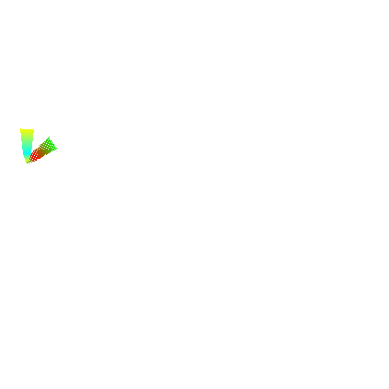

In [9]:
vp1 = np.full((H, W, 3), bg_clr, dtype = 'uint8')

fi = (np.pi)/5
fi1 = (np.pi)/2

C1 = []
C2 = []
for i in range(len(arr)):
    C1.append([arr[i][0][0], arr[i][0][1], 1])
    C2.append([arr2[i][0][0], arr2[i][0][1], 1])    
C11 = rotate(fi, C1,x_cent,y_cent)
C22 = rotate(fi1,C2,x_cent,y_cent)

vp1 = Risunok(C11,vp1,arr)
vp1 = Risunok(C22,vp1,arr2)

plt.imshow(vp1)
plt.axis('off')
